In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
print("Loading dataset...")
dataset = pd.read_csv('X_test_preprocessed_avo.csv')
print("Dataset loaded successfully.")

Loading dataset...
Dataset loaded successfully.


In [2]:
# Extracting features (X) and target variable (y)
print("Extracting features (X) and target variable (y)...")
X = dataset.drop(columns=['type'])  # Excluding 'type' column
y = dataset['AveragePrice']  #'AveragePrice' is the target variable
print("Features and target variable extracted successfully.")

Extracting features (X) and target variable (y)...
Features and target variable extracted successfully.


Producing scatterplots...


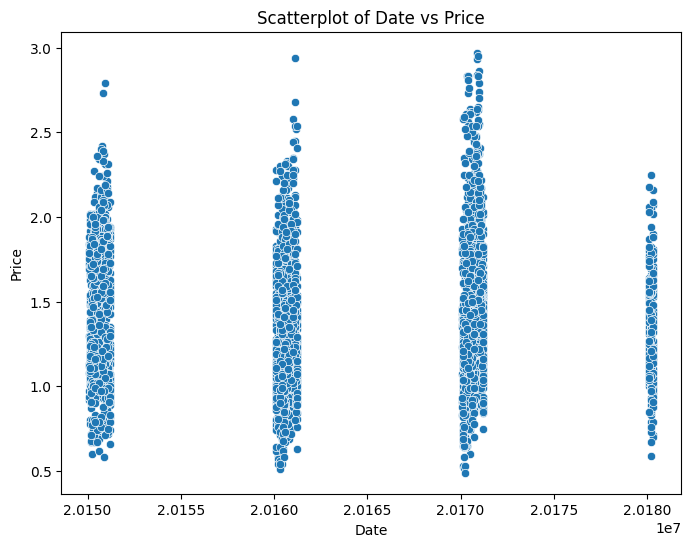

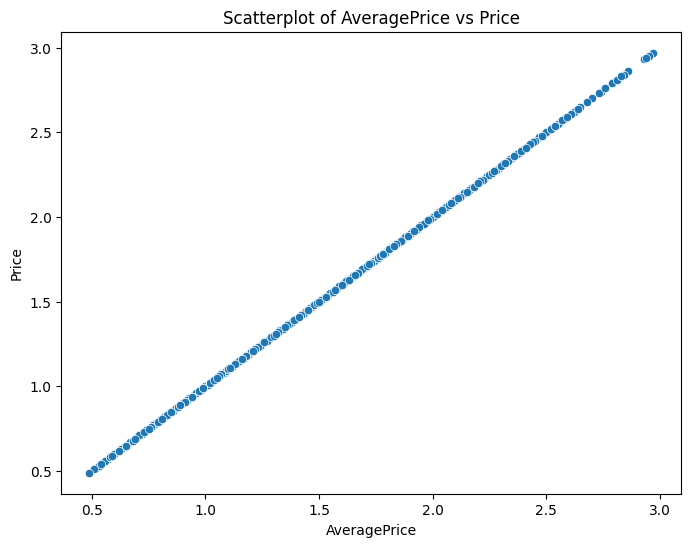

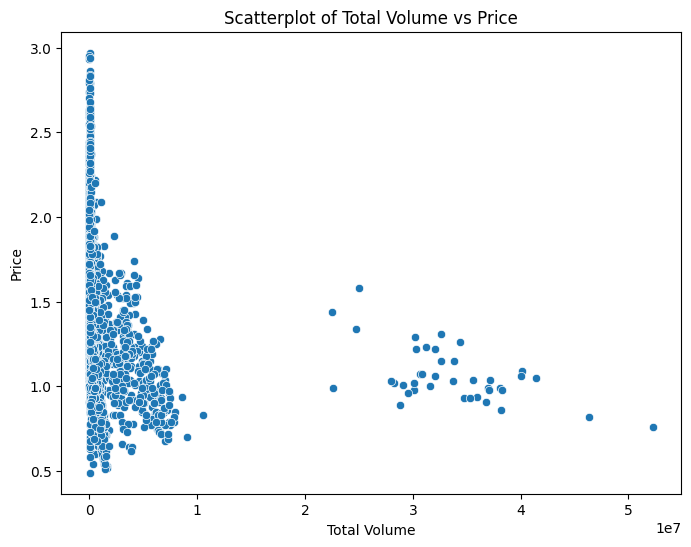

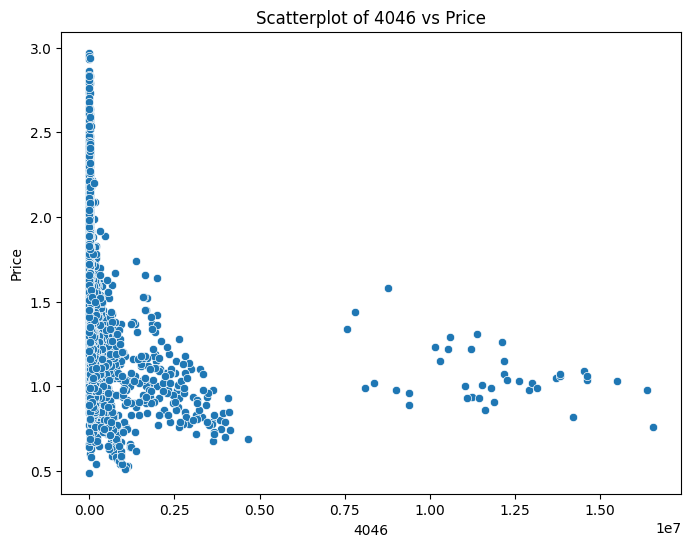

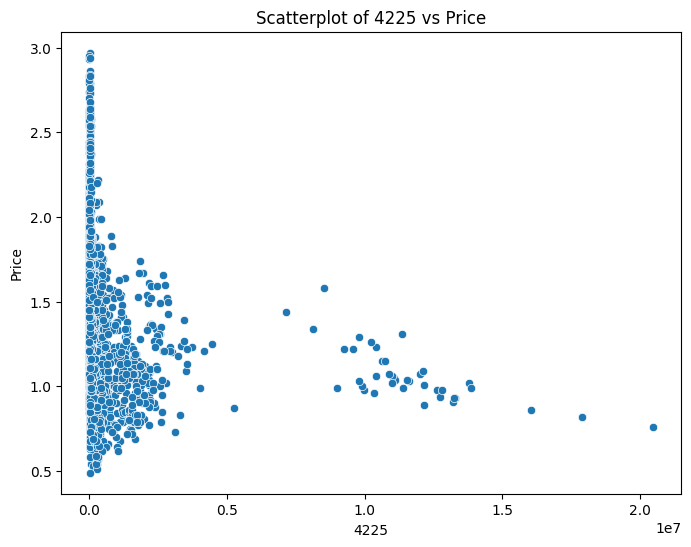

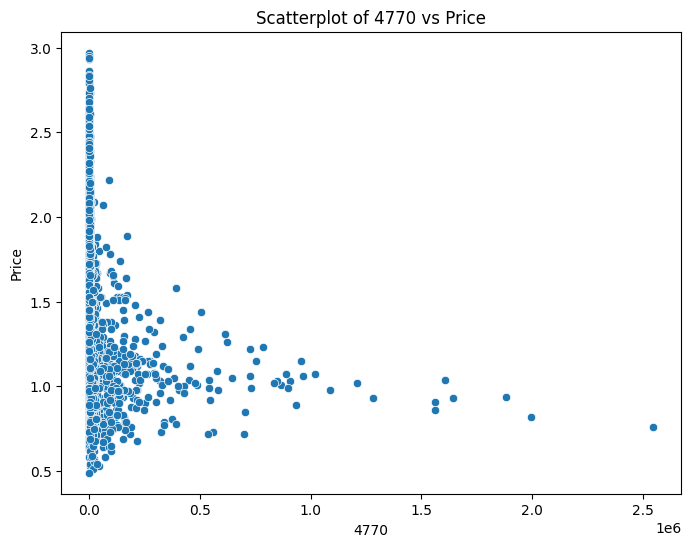

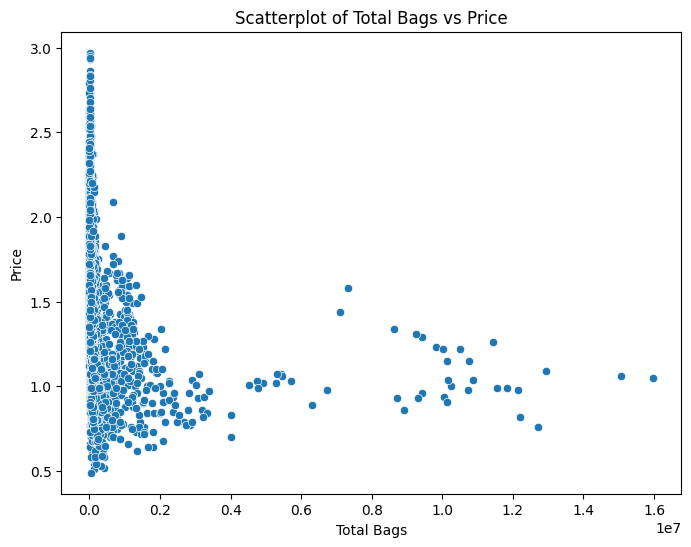

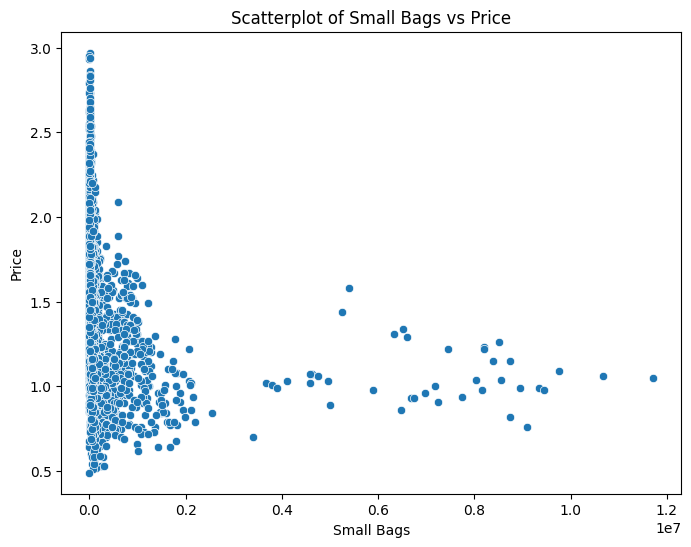

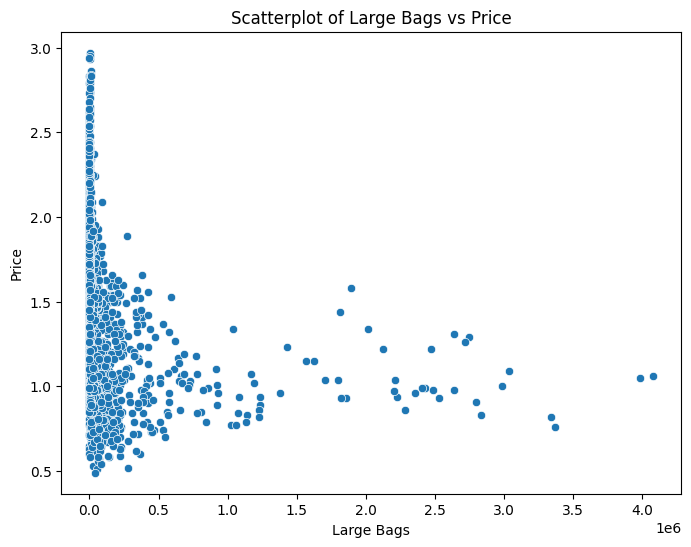

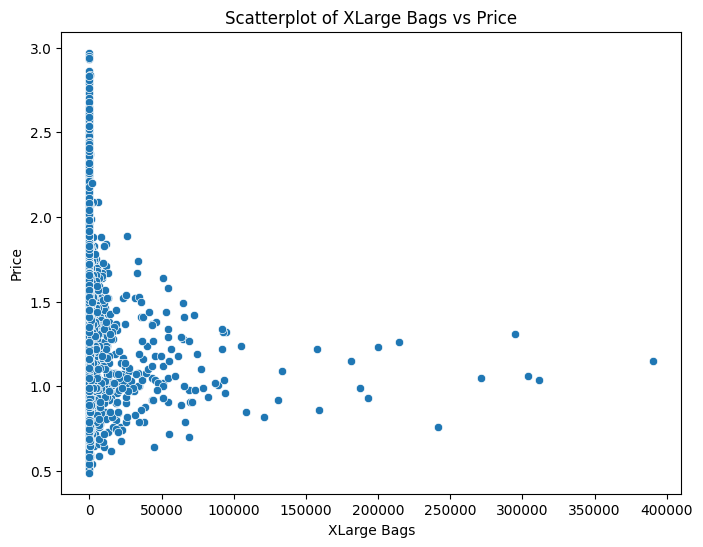

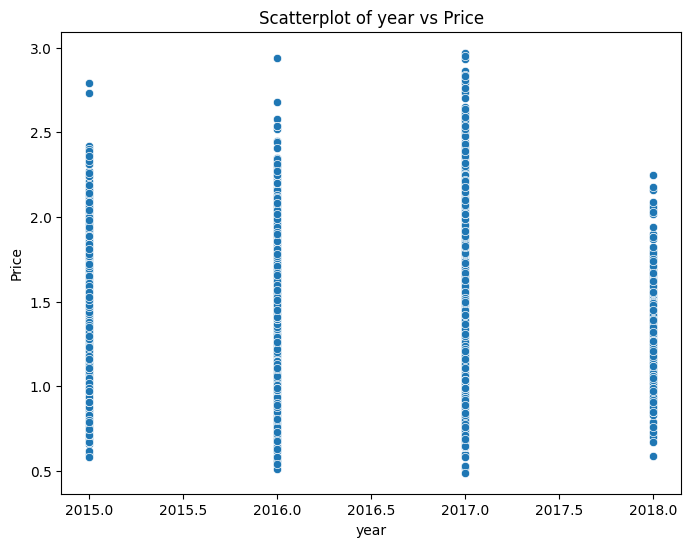

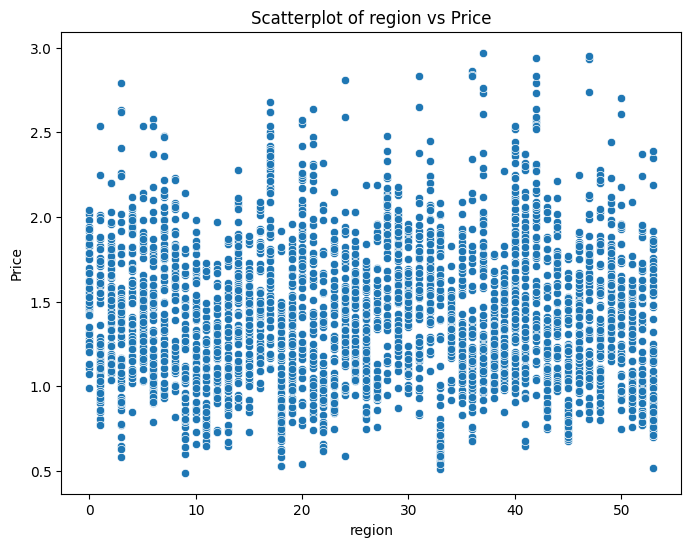

In [3]:
# Scatterplots for each independent variable against the dependent variable (price)
print("Producing scatterplots...")
for column in X.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[column], y=y)
    plt.title(f"Scatterplot of {column} vs Price")
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.show()

In [4]:
# Correlation matrix to interpret the strength of relationships
print("Correlation matrix:")
correlation_matrix = X.corr()
print(correlation_matrix)

Correlation matrix:
                  Date  AveragePrice  Total Volume      4046      4225  \
Date          1.000000      0.099482      0.010243 -0.008009 -0.011111   
AveragePrice  0.099482      1.000000     -0.205020 -0.219840 -0.184799   
Total Volume  0.010243     -0.205020      1.000000  0.975233  0.975372   
4046         -0.008009     -0.219840      0.975233  1.000000  0.920393   
4225         -0.011111     -0.184799      0.975372  0.920393  1.000000   
4770         -0.051016     -0.189760      0.869349  0.827903  0.887377   
Total Bags    0.065606     -0.190434      0.967015  0.921247  0.917778   
Small Bags    0.054527     -0.186604      0.970857  0.927291  0.926925   
Large Bags    0.092673     -0.187691      0.877328  0.829541  0.816472   
XLarge Bags   0.073267     -0.134243      0.748557  0.698047  0.701122   
year          0.999279      0.092851      0.011599 -0.006597 -0.009650   
region        0.005894     -0.013150      0.185120  0.203821  0.154313   

                 

In [5]:
# Fitting a linear model to the data
print("Fitting a linear model to the data...")
X_with_intercept = sm.add_constant(X)  # Adding intercept term
model = sm.OLS(y, X_with_intercept)
results = model.fit()
print("Linear model fitted successfully.")

Fitting a linear model to the data...
Linear model fitted successfully.


In [6]:
# Assessing the strength of the relationship
print("Assessing the strength of the relationship:")
print(results.summary())

Assessing the strength of the relationship:
                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.341e+19
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:07:03   Log-Likelihood:                 71190.
No. Observations:                3650   AIC:                        -1.424e+05
Df Residuals:                    3637   BIC:                        -1.423e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cons

In [7]:
# Based on scatterplots and correlation values, identifying variables for prediction
# 'Total Volume', 'AveragePrice', and '4046' are selected
selected_variables = ['Total Volume', 'AveragePrice', '4046']
# Using the selected independent variables
X_selected = X[selected_variables]


In [8]:
# Splitting the dataset into the Training set and Test set
print("Splitting the dataset into the Training set and Test set...")
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)
print("Dataset split completed.")

Splitting the dataset into the Training set and Test set...
Dataset split completed.


In [9]:
# Fitting Multiple Linear Regression to the Training set
print("Fitting Multiple Linear Regression to the Training set...")
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Regression model fitted successfully.")

Fitting Multiple Linear Regression to the Training set...
Regression model fitted successfully.


In [10]:
# Predicting the Test set results
print("Predicting the Test set results...")
y_pred = regressor.predict(X_test)
print("Prediction completed.")

Predicting the Test set results...
Prediction completed.


In [11]:
# Printing the predicted and actual values side by side
print("Printing the predicted and actual values side by side:")
comparison = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(comparison)

Printing the predicted and actual values side by side:
      Predicted  Actual
3516       1.94    1.94
569        1.53    1.53
991        1.18    1.18
2095       1.58    1.58
2566       1.81    1.81
...         ...     ...
2316       1.19    1.19
2980       1.98    1.98
2548       0.90    0.90
728        1.22    1.22
3479       1.18    1.18

[730 rows x 2 columns]
